<img width="10%" alt="Naas" src="https://landen.imgix.net/jtci2pxwjczr/assets/5ice39g4.png?w=160"/>

# Matplotlib - Mapping marker properties to multivariate data
<a href="https://app.naas.ai/user-redirect/naas/downloader?url=https://raw.githubusercontent.com/jupyter-naas/awesome-notebooks/master/Matplotlib/Matplotlib_Create_Waterfall_chart.ipynb" target="_parent"><img src="https://naasai-public.s3.eu-west-3.amazonaws.com/Open_in_Naas_Lab.svg"/></a><br><br><a href="https://bit.ly/3JyWIk6">Give Feedbacks</a> | <a href="https://app.naas.ai/user-redirect/naas/downloader?url=https://raw.githubusercontent.com/jupyter-naas/awesome-notebooks/master/Naas/Naas_Start_data_product.ipynb" target="_parent">Generate Data Product</a>

**Tags:** #matplotlib #chart #stackplots #markers #dataviz #snippet #operations #image #multivariate datasets

**Author:** [Mardiat-Iman](https://www.linkedin.com/in/mardiat-iman-ibrahim-imam-726027262)

**Created:** 2023-07-25

**Description:** This notebook shows how to use different properties of markers to plot multivariate datasets using Matplotlib.

**Refrences:** 

-[Mapping marker properties to multivariate data](https://matplotlib.org/stable/gallery/lines_bars_and_markers/multivariate_marker_plot.html#sphx-glr-gallery-lines-bars-and-markers-multivariate-marker-plot-py)

## Input

### Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
from matplotlib.transforms import Affine2D
from matplotlib.text import TextPath

### Setup Variables


1. `xlabel`: A string variable representing the label for the x-axis of the plot, which is "X position [m]".

2. `ylabel`: A string variable representing the label for the y-axis of the plot, which is "Y position [m]".

3. `title`: A string variable representing the title of the plot, which is 'Throwing success'.

4. `label`: A string variable representing the label for the colorbar, which is "Normalized Thrust [a.u.]".

5. `SUCCESS_SYMBOLS`: A list containing three `TextPath` objects, each representing a different symbol ("☹", "😒", "☺") used for marking successful throws on the plot.

6. `fig_path`: A string variable representing the file path where the generated figure will be saved as an image, but it seems to be missing any file-saving code in the given snippet.

7. `fig`: A reference to the figure object created by `plt.subplots()`.

8. `ax`: A reference to the axes object created by `plt.subplots()`.

9. `N`: An integer variable representing the number of data points to generate (25 in this case).

10. `np.random.seed(42)`: Setting the random seed to ensure reproducibility of the random data generation.

11. `skills`: A 1D NumPy array of length N, representing the skills of participants (values between 5 and 13).

12. `takeoff_angles`: A 1D NumPy array of length N, representing the takeoff angles in degrees (normally distributed with mean 0 and standard deviation 90).

13. `thrusts`: A 1D NumPy array of length N, representing the thrust values (random values between 0 and 1).

14. `successful`: A 1D NumPy array of length N, representing the success status (random integers 0, 1, or 2).

15. `positions`: A 2D NumPy array of shape (N, 2), representing the (x, y) positions of the data points (normally distributed around 0 with standard deviation 5).

16. `data`: A zip object that combines the `skills`, `takeoff_angles`, `thrusts`, `successful`, and `positions` arrays together. Each element of `data` is a tuple containing one data point's skill, takeoff angle, thrust, success status, and position.

17. `cmap`: A colormap obtained from `plt.get_cmap("plasma")`, which is used to color the scatter points based on the `thrusts`.


In [2]:
#Input
xlabel = "X position [m]"
ylabel = "Y position [m]"
title = 'Throwing success'
label = "Normalized Thrust [a.u.]"

SUCCESS_SYMBOLS = [
    TextPath((0, 0), "☹"),
    TextPath((0, 0), "😒"),
    TextPath((0, 0), "☺"),
]
#Output
fig_path = "fig.png"

## Model

### Create the Marker

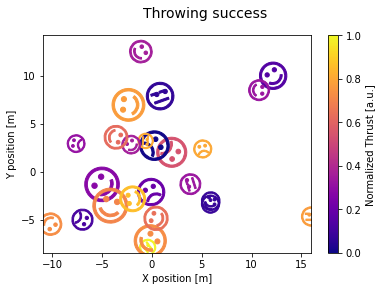

In [3]:
fig, ax = plt.subplots()
N = 25
np.random.seed(42)
skills = np.random.uniform(5, 80, size=N) * 0.1 + 5
takeoff_angles = np.random.normal(0, 90, N)
thrusts = np.random.rand(N)
successful = np.random.randint(0, 3, size=N)
positions = np.random.normal(size=(N, 2)) * 5
data = zip(skills, takeoff_angles, thrusts, successful, positions)

cmap = plt.get_cmap("plasma")

fig.suptitle((title), size=14)

for skill, takeoff, thrust, mood, pos in data:
    t = Affine2D().rotate_deg(takeoff).scale(skill)
    m = MarkerStyle(SUCCESS_SYMBOLS[mood])
    m._transform = t + m.get_transform()  # Set the custom transformation for the marker style
    ax.scatter(pos[0], pos[1], marker=m, color=cmap(thrust))

fig.colorbar(plt.cm.ScalarMappable(norm=None, cmap=cmap),
             ax=ax, label=label)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

plt.show()


## Output

### Save the figure

In [4]:
fig.savefig(fig_path)